In [164]:
import tensorflow as tf
from tensorflow import keras
from keras import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
PATH = 'SlumClassifier'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print(total_test, total_val, total_train)

batch_size = 20
IMG_HEIGHT = 512
IMG_WIDTH = 512

11 13 234


In [171]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary',)
val_data_gen = validation_image_generator.flow_from_directory(
                    validation_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=15,
                    class_mode='binary',)
test_data_gen = test_image_generator.flow_from_directory(
                    PATH,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=5,
                    classes=['test'],
                    shuffle=False)

Found 231 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


Found 10 images belonging to 1 classes.


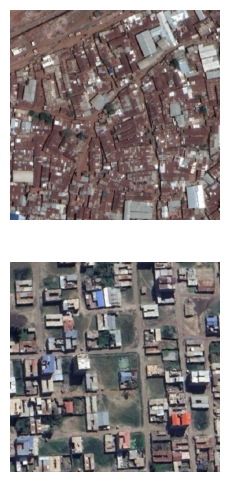

In [166]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:2])

Found 231 images belonging to 2 classes.


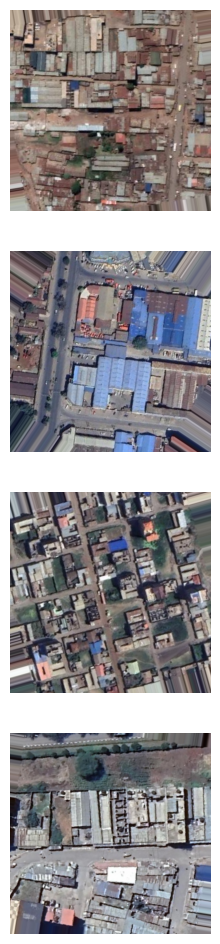

In [167]:
train_image_generator = ImageDataGenerator(rescale=1./255,                         
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                            rotation_range=90,
                                            )

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary',)

augmented_images = [train_data_gen[0][0][i] for i in range(4)]

plotImages(augmented_images)

In [168]:
model = Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(2, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(1, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(1, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 510, 510, 2)       56        
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 170, 170, 2)      0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 168, 168, 1)       19        
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 84, 84, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 82, 82, 1)         10        
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 41, 41, 1)      

In [169]:
#Needs to be retrained (40 minutes)
history = model.fit(
            train_data_gen,
            steps_per_epoch=int(total_train/batch_size),
            validation_data=val_data_gen,
            validation_steps=int(total_val),
            epochs=20
            )

Epoch 1/20


2024-03-01 11:00:23.639962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5972

2024-03-01 11:00:37.155148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 14s 1s/step - loss: 0.6899 - accuracy: 0.5972 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - 13s 1s/step - loss: 0.6694 - accuracy: 0.6872
Epoch 3/20
11/11 [==============================] - 15s 1s/step - loss: 0.6261 - accuracy: 0.6909
Epoch 4/20
11/11 [==============================] - 13s 1s/step - loss: 0.6148 - accuracy: 0.6919
Epoch 5/20
11/11 [==============================] - 13s 1s/step - loss: 0.6001 - accuracy: 0.7014
Epoch 6/20
11/11 [==============================] - 12s 1s/step - loss: 0.6081 - accuracy: 0.7014
Epoch 7/20
11/11 [==============================] - 15s 1s/step - loss: 0.5946 - accuracy: 0.7109
Epoch 8/20
11/11 [==============================] - 14s 1s/step - loss: 0.5899 - accuracy: 0.7062
Epoch 9/20
11/11 [==============================] - 14s 1s/step - loss: 0.6001 - accuracy: 0.6919
Epoch 10/20
11/11 [==============================] - 13s 1s/step - loss: 0.5907 - accur

In [172]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/2 [==============>...............] - ETA: 0s

2024-03-01 11:05:24.173723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 0s 86ms/step


array([0.66294545, 0.6229022 , 0.6063831 , 0.60610074, 0.68465054,
       0.78921735, 0.9218813 , 0.9502367 , 0.9621213 , 0.90796417],
      dtype=float32)

In [173]:
answers =  [0, 0, 0, 0, 0,
            1, 1, 1, 1, 1]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}%")


Your model correctly identified 50.0%


In [176]:
loc = "SlumClassifier/assets/model.keras"
model.save(loc)